In [21]:
!pip install -U transformers

## Local Inference on GPU
Model page: https://huggingface.co/google/t5-v1_1-small

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/google/t5-v1_1-small)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [22]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/t5-v1_1-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-small")

In [23]:
import pandas as pd

df0 = pd.read_parquet("hf://datasets/sdiazlor/text-classification-news-topics/generate_text_classification_data_0/train-00000-of-00001.parquet")
df1 = pd.read_parquet("hf://datasets/sdiazlor/text-classification-news-topics/generate_text_classification_data_1/train-00000-of-00001.parquet")
df2 = pd.read_parquet("hf://datasets/sdiazlor/text-classification-news-topics/generate_text_classification_data_2/train-00000-of-00001.parquet")

df = pd.concat([df0, df1, df2], ignore_index=True)
df.head()

,task,input_text,label,misleading_label,distilabel_metadata,model_name
0,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
1,"Determine the news article as sports, business",The recent surge in the price of crude oil has...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
2,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
3,"Determine the news article as sports, business",The New York Knicks' struggles on the court ha...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct
4,"Determine the news article as sports, business",The New York Knicks' recent acquisition of sta...,sports,business,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct


In [24]:
df["source_text"] = "classify: " + df["input_text"].astype(str)
df["target_text"] = df["label"].astype(str)

In [25]:
df.isnull().sum()

,0
task,0
input_text,3
label,3
misleading_label,3
distilabel_metadata,0
model_name,0
source_text,0
target_text,0


In [26]:
df.dropna(subset=["input_text", "label"])

,task,input_text,label,misleading_label,distilabel_metadata,model_name,source_text,target_text
0,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The recent surge in cryptocurrency p...,business
1,"Determine the news article as sports, business",The recent surge in the price of crude oil has...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The recent surge in the price of cru...,business
2,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The recent surge in cryptocurrency p...,business
3,"Determine the news article as sports, business",The New York Knicks' struggles on the court ha...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The New York Knicks' struggles on th...,business
4,"Determine the news article as sports, business",The New York Knicks' recent acquisition of sta...,sports,business,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The New York Knicks' recent acquisit...,sports
...,...,...,...,...,...,...,...,...
1195,Recognize the topic of the news article as Fac...,The recent study published in the Journal of E...,Fact-based,Opinion-based,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The recent study published in the Jo...,Fact-based
1196,Recognize the topic of the news article as Fac...,The report by the World Health Organization su...,Fact-based,Opinion-based,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The report by the World Health Organ...,Fact-based
1197,Recognize the topic of the news article as Fac...,The recent surge in global demand for renewabl...,Fact-based,Opinion-based,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The recent surge in global demand fo...,Fact-based
1198,Recognize the topic of the news article as Fac...,The recent study on the efficacy of renewable ...,Opinion-based,Fact-based,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The recent study on the efficacy of ...,Opinion-based


In [27]:
df.head()

,task,input_text,label,misleading_label,distilabel_metadata,model_name,source_text,target_text
0,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The recent surge in cryptocurrency p...,business
1,"Determine the news article as sports, business",The recent surge in the price of crude oil has...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The recent surge in the price of cru...,business
2,"Determine the news article as sports, business",The recent surge in cryptocurrency prices has ...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The recent surge in cryptocurrency p...,business
3,"Determine the news article as sports, business",The New York Knicks' struggles on the court ha...,business,sports,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The New York Knicks' struggles on th...,business
4,"Determine the news article as sports, business",The New York Knicks' recent acquisition of sta...,sports,business,{'raw_output_generate_text_classification_data...,meta-llama/Meta-Llama-3.1-8B-Instruct,classify: The New York Knicks' recent acquisit...,sports


In [28]:
def preprocess_function(examples):
    inputs = tokenizer(examples["source_text"], padding="max_length", truncation=True, max_length=128)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["target_text"], padding="max_length", truncation=True, max_length=16)
    inputs["labels"] = labels["input_ids"]
    return inputs

In [29]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df[["source_text", "target_text"]], test_size=0.1, random_state=42)

In [30]:
from torch.utils.data import Dataset
import torch

class T5Dataset(Dataset):
    def __init__(self, tokenizer, dataframe, source_col, target_col, max_len=512):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.source_col = source_col
        self.target_col = target_col
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        source = self.data.iloc[index][self.source_col]
        target = self.data.iloc[index][self.target_col]

        source_encoding = self.tokenizer(
            source,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )
        target_encoding = self.tokenizer(
            target,
            padding="max_length",
            truncation=True,
            max_length=32,
            return_tensors="pt"
        )

        labels = target_encoding["input_ids"]
        labels[labels == tokenizer.pad_token_id] = -100

        return {
            "input_ids": source_encoding["input_ids"].squeeze(),
            "attention_mask": source_encoding["attention_mask"].squeeze(),
            "labels": labels.squeeze()
        }

In [31]:
train_dataset = T5Dataset(tokenizer, train_df, "source_text", "target_text")
val_dataset = T5Dataset(tokenizer, val_df, "source_text", "target_text")

In [32]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google/t5-v1_1-small")
model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-small")

In [33]:
import re, numpy as np
from difflib import SequenceMatcher
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


CANON_MAP = {

}

def _norm(s: str) -> str:
    s = s.strip().lower()
    s = re.sub(r'^(label|class|topic)\s*[:：]\s*', '', s)
    s = re.sub(r'\s+', ' ', s)
    s = re.sub(r'[^\w\s&/+-]', '', s)
    return s

def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]

    pad_id = tokenizer.pad_token_id


    def ensure_2d(arr):
        if hasattr(arr, "cpu"): arr = arr.cpu().numpy()
        arr = np.asarray(arr)
        if arr.ndim == 3:
            arr = arr.argmax(-1)
        if arr.ndim == 2:
            return arr.astype(np.int32)

        arr_list = list(arr)
        max_len = max(len(x) for x in arr_list)
        out = np.full((len(arr_list), max_len), pad_id, dtype=np.int32)
        for i, x in enumerate(arr_list):
            x = np.asarray(x, dtype=np.int32).reshape(-1)
            out[i, :len(x)] = x
        return out

    preds  = ensure_2d(preds)
    labels = ensure_2d(labels)


    labels = np.where(labels != -100, labels, pad_id)


    y_pred = tokenizer.batch_decode(preds.tolist(),  skip_special_tokens=True)
    y_true = tokenizer.batch_decode(labels.tolist(), skip_special_tokens=True)


    y_true_norm = [_norm(t) for t in y_true]
    canon_labels = sorted(set(y_true_norm))

    norm2canon = {c: CANON_MAP.get(c, c) for c in canon_labels}

    def map_to_known(p):
        n = _norm(p)
        if n in norm2canon:
            return norm2canon[n]

        best, score = None, 0.0
        for k in norm2canon.keys():
            sc = SequenceMatcher(None, n, k).ratio()
            if sc > score:
                best, score = k, sc
        if score >= 0.8:
            return norm2canon[best]
        return f"__unk__:{n}"

    y_pred_norm = [map_to_known(p) for p in y_pred]
    y_true_norm = [norm2canon[_norm(t)] for t in y_true]

    print("SAMPLE pairs:", list(zip(y_pred[:5], y_true[:5])))
    unk = [p for p in y_pred_norm if p.startswith("__unk__")]
    if unk:
        cnt = Counter(unk).most_common(5)
        total = len(y_pred_norm)
        print(f"unknown preds: {len(unk)}/{total} ({len(unk)/total:.1%}), top:", cnt)


    return {
        "eval_accuracy":  accuracy_score(y_true_norm, y_pred_norm),
        "eval_f1":        f1_score(y_true_norm, y_pred_norm, average="weighted", zero_division=0),
        "eval_precision": precision_score(y_true_norm, y_pred_norm, average="weighted", zero_division=0),
        "eval_recall":    recall_score(y_true_norm, y_pred_norm, average="weighted", zero_division=0),
    }


In [34]:
import torch
from transformers import Trainer

class GenTrainer(Trainer):
    def __init__(self, *args, gen_kwargs=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.gen_kwargs = gen_kwargs or {}
        self.gen_kwargs.setdefault("max_length", 8)
        self.gen_kwargs.setdefault("num_beams", 4)

    def prediction_step(self, model, inputs, prediction_loss_only, ignore_keys=None):
        has_labels = "labels" in inputs
        inputs = self._prepare_inputs(inputs)

        with torch.no_grad():
            outputs = model(**inputs)
            loss = outputs["loss"].detach() if has_labels else None

        if prediction_loss_only:
            return (loss, None, None)

        gen_inputs = {
            "input_ids": inputs["input_ids"],
            "attention_mask": inputs.get("attention_mask", None),
        }
        with torch.no_grad():
            generated_tokens = model.generate(**gen_inputs, **self.gen_kwargs)

        max_len = self.gen_kwargs.get("max_length", generated_tokens.shape[-1])
        if generated_tokens.shape[-1] < max_len:
            pad_id = self.tokenizer.pad_token_id
            pad = torch.full((generated_tokens.shape[0], max_len - generated_tokens.shape[-1]),
                             pad_id, dtype=generated_tokens.dtype, device=generated_tokens.device)
            generated_tokens = torch.cat([generated_tokens, pad], dim=-1)

        labels = inputs["labels"] if has_labels else None
        return (loss, generated_tokens.detach(), labels.detach() if labels is not None else None)


In [35]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    learning_rate=3e-4,
    logging_steps=10,
    logging_dir="./logs",
    save_steps=500,
    save_total_limit=2,
    remove_unused_columns=False,
    report_to="none"
)

In [36]:
gen_kwargs = {
    "max_length": 6,
    "num_beams": 4,
    "no_repeat_ngram_size": 3,
    "length_penalty": 0.1,
    "early_stopping": True,
    "eos_token_id": tokenizer.eos_token_id,
}

from transformers import Trainer

trainer = GenTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    gen_kwargs=gen_kwargs,
)


/tmp/ipython-input-1147875730.py:6: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `GenTrainer.__init__`. Use `processing_class` instead.
  super().__init__(*args, **kwargs)


In [37]:
trainer.train()

Step,Training Loss
10,21.047800
20,17.089300
30,15.666600
40,12.765100
50,11.181600
60,9.547800
70,7.787000
80,6.818100
90,5.280300
100,4.242900


TrainOutput(global_step=405, training_loss=3.7101972073684504, metrics={'train_runtime': 149.654, 'train_samples_per_second': 21.65, 'train_steps_per_second': 2.706, 'total_flos': 602285235240960.0, 'train_loss': 3.7101972073684504, 'epoch': 3.0})

In [38]:
trainer.evaluate()

Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Tr

SAMPLE pairs: [('Fact-based', 'Fact-based'), ('sci/tech', 'sci/tech'), ('sci/tech', 'sci'), ('world', 'world'), ('sci/tech', 'sci/tech')]


{'eval_accuracy': 0.75,
 'eval_f1': 0.6943045775362847,
 'eval_precision': 0.6504428402566701,
 'eval_recall': 0.75,
 'eval_loss': 0.28969845175743103,
 'eval_runtime': 8.5577,
 'eval_samples_per_second': 14.022,
 'eval_steps_per_second': 1.753,
 'epoch': 3.0}

Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
Trainer.tokenizer is now deprecated. You should use Tr

SAMPLE pairs: [('Fact-based', 'Fact-based'), ('sci/tech', 'sci/tech'), ('sci/tech', 'sci'), ('world', 'world'), ('sci/tech', 'sci/tech')]


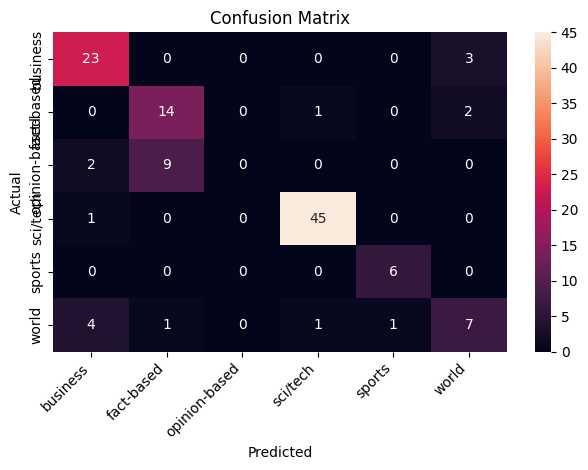

In [40]:
import numpy as np, re
from sklearn.metrics import confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt

out = trainer.predict(val_dataset)
pred_ids, label_ids = out.predictions, out.label_ids
pad = tokenizer.pad_token_id
label_ids = np.where(label_ids != -100, label_ids, pad)

y_pred_txt = tokenizer.batch_decode(pred_ids.tolist(),  skip_special_tokens=True)
y_true_txt = tokenizer.batch_decode(label_ids.tolist(), skip_special_tokens=True)


def norm(s):
    s = s.strip().lower()
    s = re.sub(r'^(label|class|topic)\s*[:：]\s*', '', s)
    s = re.sub(r'[^\w\s&/+-]', '', s)
    return s
CANON = {"sci":"sci/tech", "science":"sci/tech", "facts":"fact-based"}

y_true = [CANON.get(norm(t), norm(t)) for t in y_true_txt]
labels_list = sorted(set(y_true))
to_id = {c:i for i,c in enumerate(labels_list)}

y_pred = [to_id.get(CANON.get(norm(p), norm(p)), -1) for p in y_pred_txt]
y_true = [to_id[c] for c in y_true]


mask = np.array([p != -1 for p in y_pred])
cm = confusion_matrix(np.array(y_true)[mask], np.array(y_pred)[mask], labels=range(len(labels_list)))

ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel("Predicted"); ax.set_ylabel("Actual"); ax.set_title("Confusion Matrix")
ax.set_xticklabels(labels_list, rotation=45, ha="right"); ax.set_yticklabels(labels_list)
plt.tight_layout(); plt.show()


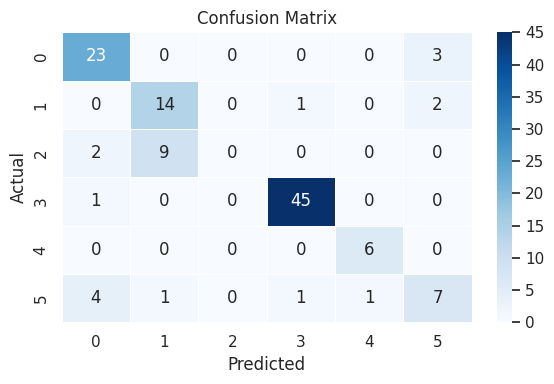

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('default')
sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(6,4), facecolor='white')
sns.heatmap(
    cm, annot=True, fmt='d',
    cmap='Blues',
    linewidths=0.5,
    linecolor='white',
    cbar=True, ax=ax
)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [45]:
import os, time, re, psutil, torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()


def pick_texts(dataset, n=64):
    cand_cols = ["input_text", "text", "article", "content"]
    col = next((c for c in cand_cols if c in getattr(dataset, "column_names", [])), None)
    if col is None:

        return ["This is a short test sentence for timing."] * n
    return [dataset[i][col] for i in range(min(n, len(dataset)))]

texts = pick_texts(val_dataset, n=64)


def encode_batch(text_list):
    enc = tokenizer(
        text_list,
        return_tensors="pt",
        padding=True,
        truncation=True,
    )
    return {k: v.to(device) for k, v in enc.items()}

def generate_with_len(model, inputs, max_new_tokens=6, **gen_kwargs):
    max_len = int(inputs["input_ids"].size(1) + max_new_tokens)
    return model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs.get("attention_mask", None),
        max_length=max_len,
        **gen_kwargs
    )

@torch.inference_mode()
def measure_batch_latency(batch_texts, repeats=10, warmup=3, max_new_tokens=6, **gen_kwargs):
    inputs = encode_batch(batch_texts)

    if device.type == "cuda":
        torch.cuda.empty_cache()
        torch.cuda.reset_peak_memory_stats()


    for _ in range(warmup):
        _ = generate_with_len(model, inputs, max_new_tokens=max_new_tokens, **gen_kwargs)
        if device.type == "cuda":
            torch.cuda.synchronize()


    times = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        _ = generate_with_len(model, inputs, max_new_tokens=max_new_tokens, **gen_kwargs)
        if device.type == "cuda":
            torch.cuda.synchronize()
        times.append(time.perf_counter() - t0)


    gpu_cur = gpu_peak = None
    if device.type == "cuda":
        gpu_cur  = torch.cuda.memory_allocated() / (1024**2)
        gpu_peak = torch.cuda.max_memory_allocated() / (1024**2)

    cpu_mem_mb = psutil.Process(os.getpid()).memory_info().rss / (1024**2)

    return {
        "batch_size": len(batch_texts),
        "latency_batch_avg_s": float(np.mean(times)),
        "latency_batch_p50_s": float(np.median(times)),
        "latency_batch_p90_s": float(np.percentile(times, 90)),
        "gpu_mem_current_mb": None if gpu_cur is None else round(gpu_cur, 2),
        "gpu_mem_peak_mb": None if gpu_peak is None else round(gpu_peak, 2),
        "cpu_mem_mb": round(cpu_mem_mb, 2),
    }

gen_kwargs = dict(
    num_beams=4,
    no_repeat_ngram_size=3,
    length_penalty=0.1,
    early_stopping=True,
    eos_token_id=tokenizer.eos_token_id,
)


single_text = [texts[0]]
single_stats = measure_batch_latency(single_text, repeats=20, warmup=5, max_new_tokens=6, **gen_kwargs)
avg_single_latency_s = single_stats["latency_batch_avg_s"]


results = {}
for bs in [1, 8, 16, 32]:
    batch = (texts * ((bs + len(texts) - 1)//len(texts)))[:bs]
    try:
        stats = measure_batch_latency(batch, repeats=10, warmup=3, max_new_tokens=6, **gen_kwargs)
        results[bs] = stats
    except RuntimeError as e:
        if "out of memory" in str(e).lower():
            results[bs] = {"batch_size": bs, "latency_batch_avg_s": None, "OOM": True}
            if device.type == "cuda":
                torch.cuda.empty_cache()
        else:
            raise


print("\n=== Metrics ===")
print(f"Average Inference Latency (single input): {avg_single_latency_s*1000:.2f} ms")
if device.type == "cuda":
    print(f"GPU Memory (Current Allocated): {single_stats['gpu_mem_current_mb']} MB")
    print(f"GPU Memory (Peak Allocated):    {single_stats['gpu_mem_peak_mb']} MB")
else:
    print("GPU Memory: N/A (running on CPU)")
print(f"CPU Memory Usage: {single_stats['cpu_mem_mb']} MB\n")

for bs in [1, 8, 16, 32]:
    st = results.get(bs, {})
    if st.get("OOM"):
        print(f"Batch Size {bs} Latency: OOM")
    else:
        print(f"Batch Size {bs} Latency: {st['latency_batch_avg_s']*1000:.2f} ms per batch")



=== Metrics ===
Average Inference Latency (single input): 229.04 ms
GPU Memory (Current Allocated): 4213.69 MB
GPU Memory (Peak Allocated):    4217.16 MB
CPU Memory Usage: 2930.57 MB

Batch Size 1 Latency: 110.43 ms per batch
Batch Size 8 Latency: 150.84 ms per batch
Batch Size 16 Latency: 101.83 ms per batch
Batch Size 32 Latency: 113.55 ms per batch
